<header>
               <img src="https://i.postimg.cc/FRVSXj7M/We-are-having-a-   baby-girl.jpg" alt="wndy-brrs2" 
                border="10" height="600" width="1500">                                                           
</header>


<div style="text-align: left">
    
   ## 2016 US Bike Share Activity Snapshot</div>

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<div style="text-align: left">
<a id='intro'></a>
 
 ## Introduction

> **Tip**: Quoted sections like this will provide helpful instructions on how to navigate and use a Jupyter notebook.


Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

</div>

<div style="text-align: left">
   <a id='pose_questions'></a>
   ## Posing Questions
   Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?
</div>
<br />
<div style="text-align: left">
   <span style="background-color: #82ccdd;color:#ffffff" >
   Question 1: Write at least two questions related to bike sharing that you think could be answered by data.
   </span>
   <br />
   **Answer:** 
   <br />
   <span style="background-color: #FD7272;color:#ffffff" >
   Before I see the data:<br />
   </span>
   Q1. Which city has most trips on bikes this in 2016?  <br />
   Q2. Are the trips on bikes more during the weekdays or on weekend?<br />
   Q3. What's the most category of users riding a bike?<br />
   Q4. What's the highest month of the trips during the years? is this month on holiday or school days?<br /><br />
   <span style="background-color: #FD7272;color:#ffffff" >
   After I looked at the data, I suggest these questions:<br />
   </span>
   Q5. At the 3 datasets, there are a start and end stations points. So, what are the most stations visited at each city? is there a specific path between these stations occurs?<br />
   Q6. Can I calculate the total duration trips per year of these cities? 
   <br /><br />
   
  > **Tip**: If you double click on this cell, you will see the text change so that all of the formatting is removed. This allows you to edit this block of text. This block of text is written using [Markdown](http://daringfireball.net/projects/markdown/syntax), which is a way to format text using headers, links, italics, and many other options using a plain-text syntax. You will also use Markdown later in the Nanodegree program. Use **Shift** + **Enter** or **Shift** + **Return** to run the cell and show its rendered form.
</div>

<div style="align: center">
<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div>

<div style="text-align: left">
<a id='wrangling'></a>

## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

<br />
<span style="background-color: #82ccdd;color:#ffffff" >
    **Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).</div>

> **Tip**: You can run a code cell like you formatted Markdown cells above by clicking on the cell and using the keyboard shortcut **Shift** + **Enter** or **Shift** + **Return**. Alternatively, a code cell can be executed using the **Play** button in the toolbar after selecting it. While the cell is running, you will see an asterisk in the message to the left of the cell, i.e. `In [*]:`. The asterisk will change into a number to show that execution has completed, e.g. `In [1]`. If there is output, it will show up as `Out [1]:`, with an appropriate number to match the "In" number.</div>


In [2]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.
    

In [3]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##
        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
        first_trip = next(trip_reader)
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        import pprint 
        pp = pprint.PrettyPrinter()
        pp.pprint(first_trip)
        
        
    # output city name and first trip for later testing
    return (city, first_trip)

# list of files for each city
data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

<br />

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>

<div style="align: left">
<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div>

### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


<span style="background-color: #82ccdd;color:#ffffff" >
    **Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.
</span>


In [4]:
def duration_in_mins(datum, city):
    
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    
    
    """
    my test print statements
    print(datum['tripduration'])
    print(float(datum['tripduration']))
    min = float(datum['tripduration'])/60
    print(min)
    
    finally, I find the right result but I need to take only 4 digits after the point 
    so I search about the solution this documentation helps me 
    https://docs.python.org/2/tutorial/floatingpoint.html
    duration= round(min, 4)
   """
    
    
    if (city == "NYC") or (city == "Chicago"):
        duration = round(float(datum['tripduration'])/60,4)
        print(duration)

    elif city == "Washington":
        duration = round((float(datum['Duration (ms)'])/60)/1000,4)
        print(duration)
        
    else:
        print("City: Wrong Massage")
  

    return duration    


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) < .001

13.9833
15.4333
7.1231


<div style="align: left">
<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div>

In [5]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    
    
    """
    I watched this vedio to understand how to formatting of the DateTime object work 
    and how to convert it from the string. 
    https://www.youtube.com/watch?v=BSL7lOgVX-8
    Now I will try to specify the variables based on dataset format
    """
    
    # YOUR CODE HERE
    
    format ="%m/%d/%Y %H:%M:%S"
    format2= "%m/%d/%Y %H:%M"
    
    
    if city == 'NYC': 
        datetime_obj = datetime.strptime(datum["starttime"],format)
        print(datetime_obj.month," ",datetime_obj.hour," ",datetime_obj.strftime("%A"))
        month = datetime_obj.month
        hour = datetime_obj.hour
        day_of_week = datetime_obj.strftime("%A")
    
    elif city == 'Chicago':
        datetime_obj = datetime.strptime(datum["starttime"], format2)
        print(datetime_obj.month," ",datetime_obj.hour," ",datetime_obj.strftime("%A"))
        month = datetime_obj.month
        hour = datetime_obj.hour
        day_of_week = datetime_obj.strftime("%A")
 
    elif city == 'Washington':
        datetime_obj = datetime.strptime(datum['Start date'],format2) 
        print(datetime_obj.month," ",datetime_obj.hour," ",datetime_obj.strftime("%A"))
        month = datetime_obj.month
        hour = datetime_obj.hour
        day_of_week = datetime_obj.strftime("%A")
    else:
        print("City: Wrong Massage")
        
    return (month, hour, day_of_week)

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

1   0   Friday
3   23   Thursday
3   22   Thursday


<div style="align: left">
<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div>

In [6]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if (city == "NYC") or (city == "Chicago"): 
        user_type = datum['usertype']
        print(user_type)
    
    elif city == 'Washington':
        user_type = datum['Member Type']
        
        if user_type == 'Registered':
            user_type = 'Subscriber'
            print(user_type)
        else:
            user_type = 'Customer'
            print(user_type)
    else:
        print("City: Wrong Massage")
        
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

Customer
Subscriber
Subscriber


<div style="align: left">
<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div>

<span style="background-color: #82ccdd;color:#ffffff" >
    **Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city     consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.
    </span>


In [7]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'user_type']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)

        # collect data from and process each row
        for row in trip_reader:
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            
            # The data set contain trip duration, starting month, starting hour, 
            # day of the week, and user type
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            
            #1) Calculate the duration
            new_point['duration'] = duration_in_mins(row,city) 
                    
            #2) Then get the month , hour and day of week 
            new_point['month'],new_point['hour'],new_point['day_of_week'] = time_of_trip(row,city)
            
            #3) Finally, get user type
            new_point['user_type'] = type_of_user(row,city)


            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            trip_writer.writerow(new_point)
            
            
            

In [8]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

"""
I commented this part because the printing of all data in 3 files make the work of kernel slow
for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])
"""

"\nI commented this part because the printing of all data in 3 files make the work of kernel slow\nfor city, filenames in city_info.items():\n    condense_data(filenames['in_file'], filenames['out_file'], city)\n    print_first_point(filenames['out_file'])\n"


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<div style="align: left">
<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div>

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.
<br /><br />
<span style="background-color: #82ccdd;color:#ffffff" >
**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?
</span>
<br />
**Answer**:
<table style="align:center,border:1px solid black;">
    <tr style="background-color: #FD7272;color:#ffffff;">
        <th colspan="2"> Answer of Q4a </th>
    </tr>
    <tr style="background-color: #ecf0f1">
        <th>Which city has the highest number of trips? </th>
        <th>NYC</th>
    </tr>
    <tr style="background-color: #ffffff">
        <th>Which city has the highest proportion of trips made by subscribers?</th>
        <th>NYC</th>
    </tr>
    <tr style="background-color: #ecf0f1">
        <th>Which city has the highest proportion of trips made by short-term customers?</th>
        <th>Chicago</th>
    </tr>
</table>


In [9]:
def number_of_trips(filename):
    """
    This function reads in a file with trip data and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(n_subscribers, n_customers, n_total)

In [10]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##


#1) I will create a list of files for each city
data_files = ['./data/NYC-2016-Summary.csv',
              './data/Chicago-2016-Summary.csv',
              './data/Washington-2016-Summary.csv',]

In [11]:
# 2)Creating a 2D Dictionary to store the data to answer Q4a and assign the all values to 0
# This article is very useful https://www.programiz.com/python-programming/nested-dictionary

stat = {'NYC': {'Subscribers': 0, 'Short-term customers': 0, 'Total': 0},
          'Chicago': {'Subscribers': 0, 'Short-term customers': 0, 'Total': 0},
          'Washington': {'Subscribers': 0, 'Short-term customers': 0, 'Total': 0}}

for data_file in data_files:
    
    Subscribers,customers,Total = number_of_trips(data_file)
    if data_file =='./data/NYC-2016-Summary.csv':
        stat['NYC']['Subscribers'] = Subscribers
        stat['NYC']['Short-term customers'] = customers
        stat['NYC']['Total'] = Total
        
    elif data_file == './data/Chicago-2016-Summary.csv':
        stat['Chicago']['Subscribers'] = Subscribers
        stat['Chicago']['Short-term customers'] = customers
        stat['Chicago']['Total'] = Total
        
    elif data_file == './data/Washington-2016-Summary.csv':
        stat['Washington']['Subscribers'] = Subscribers
        stat['Washington']['Short-term customers'] = customers
        stat['Washington']['Total'] = Total
    else:
        print("Error:city not found")

In [12]:
# 3)Print the stat dictionary 
print('------------------------------------------------') 
print('|          Print out of the dictionary          |') 
print('------------------------------------------------') 
for p_id, p_info in stat.items():
    print("\nCity:", p_id)
    
    for key in p_info:
        print(key + ':', p_info[key])
print('------------------------------------------------\n')  

------------------------------------------------
|          Print out of the dictionary          |
------------------------------------------------

City: NYC
Subscribers: 245896
Short-term customers: 30902
Total: 276798

City: Chicago
Subscribers: 54982
Short-term customers: 17149
Total: 72131

City: Washington
Subscribers: 51753
Short-term customers: 14573
Total: 66326
------------------------------------------------



In [13]:
# 4)Find the max total by creating funtion return the city name 
def find_max (num1,num2,num3):
    """
    I will try to find all possible situations to avoid the bugs: 
    a) if the values don't equal each other the first 3 if statements work well and find the biggest one.
    b) if the values equal to each other, I want to return the statement that describes the scenario.
    """
    
    NYC = num1
    Chicago = num2
    Washington = num3
    equal = "is/are equal"
    
    if (NYC > Chicago) and (NYC > Washington):
        return 'NYC'
    
    elif (Chicago > NYC) and (Chicago > Washington):
        return 'Chicago'
    
    elif (Washington > NYC) and (Washington > Chicago):
        return 'Washington'
    
    elif NYC == Chicago:
        return 'NYC and Chicago',equal
    
    elif NYC == Washington:
        return 'NYC and Washington',equal
    
    elif Chicago == Washington:
        return 'Chicago and Washington',equal
    
    else:
        return 'All cities are equal'
    

print("Which city has the highest number of trips? ",find_max(stat['NYC']['Total'],stat['Chicago']['Total'] 
      ,stat['Washington']['Total']))
print('------------------------------------------------\n') 



Which city has the highest number of trips?  NYC
------------------------------------------------



In [14]:
# 5) Calculate highest proportion of trips made by subscribers
# What is the proportion ? watch to this amazing video (https://bit.ly/2AhsazM)

NYC_sub_prop = float(stat['NYC']['Subscribers']/stat['NYC']['Total'])
Chicago_sub_prop = float(stat['Chicago']['Subscribers']/stat['Chicago']['Total'])
Washington_sub_prop = float(stat['Washington']['Subscribers']/stat['Washington']['Total'])

# Then pass this value to find_max function 
print("Which city has the highest proportion of trips made by subscribers? "
      ,find_max(NYC_sub_prop,Chicago_sub_prop,Washington_sub_prop))
print('------------------------------------------------\n') 

Which city has the highest proportion of trips made by subscribers?  NYC
------------------------------------------------



In [15]:
#6) Calculate highest proportion of trips made by short-term customers
NYC_short_prop = float((stat['NYC']['Short-term customers']/stat['NYC']['Total'])*100)
Chicago_short_prop = float((stat['Chicago']['Short-term customers']/stat['Chicago']['Total'])*100)
Washington_short_prop = float((stat['Washington']['Short-term customers']/stat['Washington']['Total'])*100)


# Then pass this value to find_max function 
print("Which city has the highest proportion of trips made by Short-term customers? "
      ,find_max(NYC_short_prop,Chicago_short_prop,Washington_short_prop))
print('------------------------------------------------\n') 

Which city has the highest proportion of trips made by Short-term customers?  Chicago
------------------------------------------------




> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

<div style="align: left">
<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div>
</br>

Now, you will write your own code to continue investigating properties of the data.

<span style="background-color: #82ccdd;color:#ffffff" >
**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?
</span>

**Answer**:


<table style="align:center,border:1px solid black;">
    <tr style="background-color: #FD7272;color:#ffffff;">
        <th >  </th>
        <th > NYC </th>
        <th > Chicago </th>
        <th > Washington </th>
    </tr>
    <tr style="background-color: #ecf0f1">
        <th>Average trip length</th>
        <th>15.81</th>
        <th>16.56</th>
        <th>18.93</th>
    </tr>
    <tr style="background-color: #ffffff">
        <th>Proportion of rides</th>
        <th>7.30%</th>
        <th>8.33%</th>
        <th>10.83%</th>
    </tr>
</table>


In [16]:
def trip_duration(filename):
    """
    This function reads in a file with trip data and reports the total of trip duration.
    """
    
    with open(filename, 'r') as f_in:
         # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_long = 0
        t_duration = 0
        n_duration = 0
        # tally up ride types
        for row in reader:
            t_duration =  t_duration + float(row['duration'])
            n_duration+=1
            if float(row['duration']) >30:
                n_long += 1
            
        # return tallies as a tuple
        return(t_duration, n_duration, n_long)     

In [17]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes. ##


#1) Create a 2D Dictionary to store the data to answer Q4b and assign the all values to 0
stat2 = {'NYC': {'avg_duraction': 0,'proportion':0},
          'Chicago': {'avg_duraction': 0,'proportion':0},
          'Washington': {'avg_duraction': 0,'proportion':0}} 

In [18]:
#2) Calculate the avarage trip duration and proportion of duration longer than 30 minutes
for data_file in data_files:
    
    total_duration,num_duration,long = trip_duration(data_file)
    if data_file =='./data/NYC-2016-Summary.csv':
        stat2['NYC']['avg_duraction'] = total_duration/num_duration
        stat2['NYC']['proportion'] = (long/num_duration)*100
        
        
    elif data_file == './data/Chicago-2016-Summary.csv':
        stat2['Chicago']['avg_duraction'] = total_duration/num_duration
        stat2['Chicago']['proportion'] = (long/num_duration)*100
        
        
    elif data_file == './data/Washington-2016-Summary.csv':
        stat2['Washington']['avg_duraction'] = total_duration/num_duration
        stat2['Washington']['proportion'] = (long/num_duration)*100
        
    else:
        print("Error:city not found")
   

In [19]:
#3) Print the stat2 dictionary 
print('------------------------------------------------') 
print('|          Print out of the dictionary          |') 
print('------------------------------------------------') 
for p_id, p_info in stat2.items():
    print("\nCity:", p_id)
    
    for key in p_info:
        print(key + ':', round(p_info[key],4))
print('------------------------------------------------\n')  


------------------------------------------------
|          Print out of the dictionary          |
------------------------------------------------

City: NYC
avg_duraction: 15.8126
proportion: 7.3024

City: Chicago
avg_duraction: 16.5636
proportion: 8.3321

City: Washington
avg_duraction: 18.9329
proportion: 10.8389
------------------------------------------------




<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div>
<br />

<span style="background-color: #82ccdd;color:#ffffff" >
**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?
    </span>
<br />
**Answer**: 


<table style="align:center,border:1px solid black;">
    <tr style="background-color: #FD7272;color:#ffffff;">
        <th >  </th>
        <th > NYC </th>
        <th > Chicago </th>
        <th > Washington </th>
    </tr>
    <tr style="background-color: #ecf0f1">
        <th>Average of Subscribers</th>
        <th>13.68</th>
        <th>12.0672</th>
        <th>12.52</th>
    </tr>
    <tr style="background-color: #ffffff">
        <th>Average of Customers</th>
        <th>32.77</th>
        <th>30.97</th>
        <th>41.67</th>
    </tr>
</table>

Based on this table Short-term customers take longer rides than Subscribers.

In [20]:
def user_duration(filename):
    """
    This function reads in a file with trip data and reports the total of trip duration.
    """
    
    with open(filename, 'r') as f_in:
         # set up csv reader object
        reader = csv.DictReader(f_in)
        
        # initialize count variables
        n_long = 0
        Subscribers = 0
        Customers = 0
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                Subscribers = Subscribers + float(row['duration'])
            else:
                Customers = Customers + float(row['duration'])
        # return tallies as a tuple
        return(Subscribers, Customers)     

In [21]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

#1) Create a 2D Dictionary to store the data to answer Q4c and assign the all values to 0
stat3 = {'NYC': {'Avg_Subscribers': 0,'Avg_Customers':0},
          'Chicago': {'Avg_Subscribers': 0,'Avg_Customers':0},
          'Washington': {'Avg_Subscribers': 0,'Avg_Customers':0}}

In [22]:
#2) Calculate the avarage trip duration and proportion of duration longer than 30 minutes
for data_file in data_files:
    
    Subscribers,Customers = user_duration(data_file)
    if data_file =='./data/NYC-2016-Summary.csv':
        stat3['NYC']['Avg_Subscribers'] = Subscribers/stat['NYC']['Subscribers']
        stat3['NYC']['Avg_Customers'] = Customers/stat['NYC']['Short-term customers']
        
        
    elif data_file == './data/Chicago-2016-Summary.csv':
        stat3['Chicago']['Avg_Subscribers'] = Subscribers/stat['Chicago']['Subscribers']
        stat3['Chicago']['Avg_Customers'] = Customers/stat['Chicago']['Short-term customers']
        
        
    elif data_file == './data/Washington-2016-Summary.csv':
        stat3['Washington']['Avg_Subscribers'] = Subscribers/stat['Washington']['Subscribers']
        stat3['Washington']['Avg_Customers'] = Customers/stat['Washington']['Short-term customers']
        
    else:
        print("Error:city not found")
 

In [23]:
#3) Print the stat3 dictionary 
print('------------------------------------------------') 
print('|          Print out of the dictionary          |') 
print('------------------------------------------------') 
for p_id, p_info in stat3.items():
    print("\nCity:", p_id)
    
    for key in p_info:
        print(key + ':', round(p_info[key],4))
print('------------------------------------------------\n')

------------------------------------------------
|          Print out of the dictionary          |
------------------------------------------------

City: NYC
Avg_Subscribers: 13.6808
Avg_Customers: 32.776

City: Chicago
Avg_Subscribers: 12.0672
Avg_Customers: 30.9798

City: Washington
Avg_Subscribers: 12.5281
Avg_Customers: 41.678
------------------------------------------------



<div style="align: left">
<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div>

<div style="text-align: left">

<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.
</div>

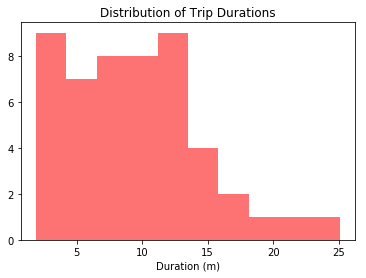

In [24]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data,color="#FD7272")
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

<div style="text-align: left">
In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.
 <span style="background-color: #FD7272;color:#ffffff" >
Here I will choose Chicago city with me till I complete this journey in my project</span>
</div>

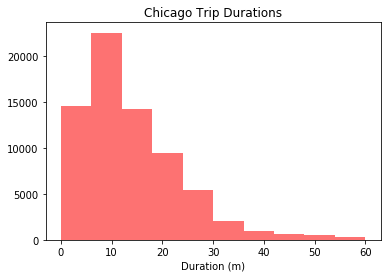

In [25]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

#1) retrieve Chicago duration Columns
Chicago_file = './data/Chicago-2016-Summary.csv'
Chicago_duration = [] 

with open(Chicago_file, 'r') as f_in:
         # set up csv reader object
        reader = csv.DictReader(f_in)
        
        for row in reader:
            Chicago_duration.append(float(row['duration']))
        

# 2)plot the Chicago duration 
#* I decided to calculate the duration in one hour
plt.hist(Chicago_duration,range=(0,60),color="#FD7272")
plt.title('Chicago Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

<div style="text-align: left">
If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

<span style="background-color: #82ccdd;color:#ffffff" >
    <br /><br />
    <div style="align: left">
<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div><br/>
**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?</span>

**Answer**: Replace this text with your response!

<table style="align:left,border:1px solid black;">
    <tr style="background-color: #FD7272;color:#ffffff;">
        <th> Question </th>
        <th> Subscribers</th>
        <th> Customers </th>
    </tr>
    <tr style="background-color: #ecf0f1">
        <th>The peak of each distribution</th>
        <th>The peak between 5 and 10</th>
        <th>The peak between 20 and 25</th>
    </tr>
    <tr style="background-color: #ffffff">
        <th>Description of each distribution</th>
        <th>The destribution is  Right skewed</th>
        <th>The destribution is  Right skewed</th>
    </tr>
</table>


</div>

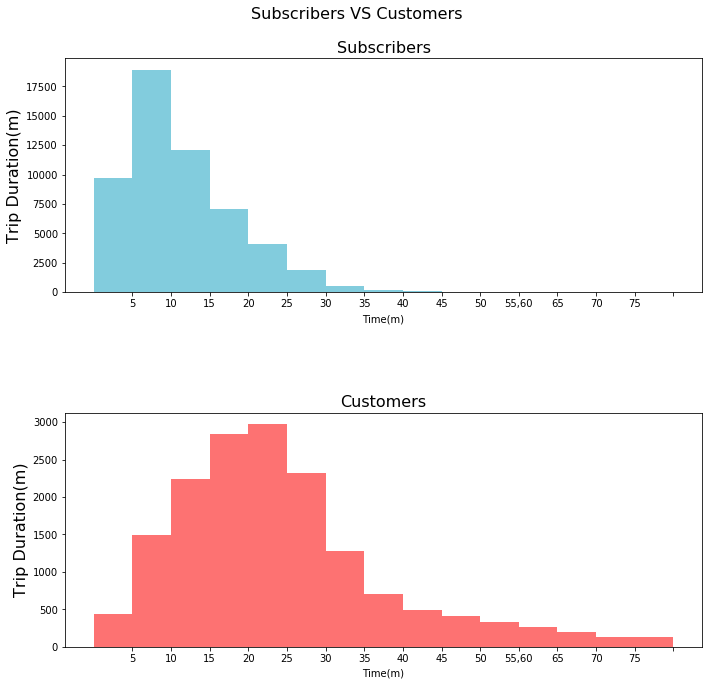

In [37]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

#1) retrieve Subscribers and Customers trip duration values
Chicago_file = './data/Chicago-2016-Summary.csv'
Subscribers = [] 
Customers =[]

with open(Chicago_file, 'r') as f_in:
         # set up csv reader object
        reader = csv.DictReader(f_in)
        
        for row in reader:
            if row['user_type'] == 'Subscriber':
                Subscribers.append(float(row['duration']))
            
            else:
                Customers.append(float(row['duration']))

# 2)Plot 2 histogram beside each other to simplify the comparing 
# ** This is an example to do it https://anenadic.github.io/2014-11-10-manchester/novice/python/01-numpy.html


# Create a figure
plt.figure(figsize=(10,10))

# Set figure title
plt.subplots_adjust(top=0.2)
plt.suptitle('Subscribers VS Customers',fontsize=16)


# I will resign X axies with intervals of 5s min 
# This source is explane how to do it 
# https://matplotlib.org/examples/ticks_and_spines/ticklabels_demo_rotation.html
x = ['5','10','15','20','25','30','35','40','45','50','55,''60','65','70','75']
position = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75]


# * I choose the 15 bins because it makes the chart more readable for the specified interval
#First chart (Subscribers)
plt.subplot(2,1, 1)
plt.ylabel('Trip Duration(m)',fontsize=16)
plt.xlabel('Time(m)',labelpad=5)
plt.hist(Subscribers,range=(0,75),color="#82ccdd",bins = 15)
plt.title('Subscribers',fontsize=16)
plt.xticks(position, x)


#Secound chart (Customers)
plt.subplot(2, 1, 2)
plt.ylabel('Trip Duration(m)',fontsize=16)
plt.xlabel('Time(m)',labelpad=5)
plt.hist(Customers,range=(0,75),color="#FD7272",bins = 15)
plt.title('Customers',fontsize=16)
plt.xticks(position, x)




plt.tight_layout()
plt.show()

### <div style="text-align: left">
    
<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.
<br/><br/>
<div style="align: left">
<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div><br/>
<span style="background-color: #82ccdd;color:#ffffff" >
**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.</span>

<span style="background-color: #FD7272;color:#ffffff" >From Q1: I chose this:<br />
point 4) What's the highest month of the trips during the years in Chicago? <br />
What is the quarter of the year has the most trips in Chicago?</span>

**Answer**: 
<table style="align:left,border:1px solid black;">
    <tr style="background-color: #FD7272;color:#ffffff;">
        <th colspan="2"> Questions </th>
    </tr>
    <tr style="background-color: #ecf0f1">
        <th>The highest month of the trips during the (2016)years in Chicago</th>
        <th>July</th>
    </tr>
    <tr style="background-color: #ffffff">
        <th>The quarter of the year that has the most trips in Chicago</th>
        <th>3rd quarter </th> 
    </tr>
</table>
</div>

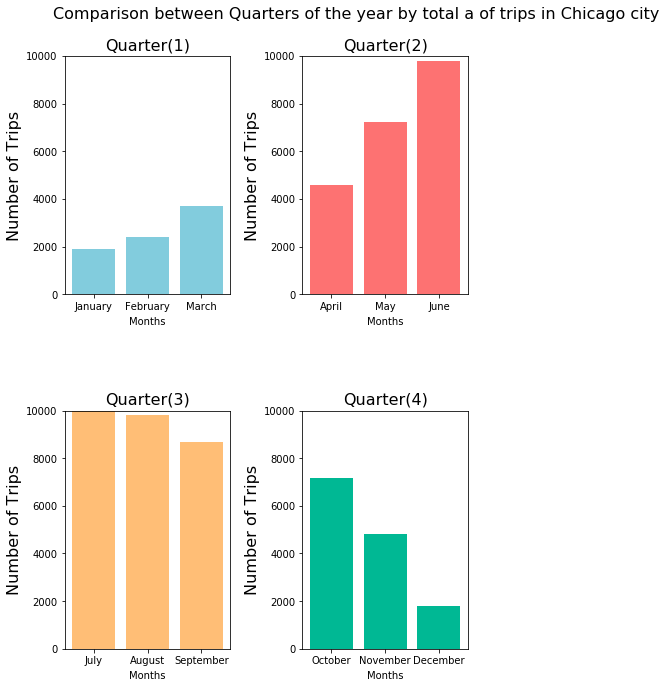

In [27]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##


#1) retrive the month total trip from Chicago dataset

with open(Chicago_file, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
        
#2)Store the total value of month trips in the dictionary.
#Dictionary keys equal month name then grouped it by quarters

        month = {"Q1":{"January":0,"February":0,"March":0}
                 ,"Q2":{"April":0,"May":0,"June":0}
                 ,"Q3":{"July":0,"August":0,"September":0}
                 ,"Q4":{"October":0,"November":0,"December":0}}
        
        for row in reader:
            if row['month'] == "1":
                month["Q1"]["January"] +=1 
            elif row['month'] == "2":
                month["Q1"]["February"] +=1 
            
            elif row['month'] == "3":
                month["Q1"]["March"] +=1 
            
            elif row['month'] == "4":
                month["Q2"]["April"] +=1 
            
            elif row['month'] == "5":
                month["Q2"]["May"] +=1 
            
            elif row['month'] == "6":
                month["Q2"]["June"] +=1 
                
            elif row['month'] == "7":
                month["Q3"]["July"] +=1 
            
            elif row['month'] == "8":
                month["Q3"]["August"] +=1 
                
            elif row['month'] == "9":
                month["Q3"]["September"] +=1 
                
            elif row['month'] == "10":
                month["Q4"]["October"] +=1 
                
            elif row['month'] == "11":
                month["Q4"]["November"] +=1 
                
            elif row['month'] == "12":
                month["Q4"]["December"] +=1 


#3) plot bar chart that displays all month values grouped by quarter of year 
# Create a figure
plt.figure(figsize=(10,10))

# Set figure title
plt.subplots_adjust(top=0.2)
plt.suptitle('Comparison between Quarters of the year by total a of trips in Chicago city',fontsize=16)



#First chart Quarter(1)
MonthOfQuarter = [0,1,2]
plt.subplot(2,3, 1)
plt.ylabel('Number of Trips',fontsize=16)
plt.ylim(0,10000)
plt.xlabel('Months',labelpad=5)
plt.bar(range(len(month["Q1"])), month["Q1"].values(), align='center',color="#82ccdd")
plt.title('Quarter(1)',fontsize=16)
# The x tick values = Month name of the  quarter(1)
plt.xticks(MonthOfQuarter,month["Q1"].keys())


#Secound chart Quarter(2)

 # Position (to know about it visit https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html)
plt.subplot(2, 3, 2)
 #Y label 
plt.ylabel('Number of Trips',fontsize=16)
 # Set Y values to simplify the comparison
plt.ylim(0,10000)
 # X label 
plt.xlabel('Months',labelpad=5)
 # Plot the bar 
plt.bar(range(len(month["Q2"])),month["Q2"].values(), align='center',color="#FD7272")
 # Plot title
plt.title('Quarter(2)',fontsize=16)
 # The x tick values = Month name of the  quarter(2)
plt.xticks(MonthOfQuarter,month["Q2"].keys())


#Secound chart Quarter(3)
plt.subplot(2, 3, 4)
plt.ylabel('Number of Trips',fontsize=16)
plt.ylim(0,10000)
plt.xlabel('Months',labelpad=5)
plt.bar(range(len(month["Q3"])),month["Q3"].values(), align='center',color="#ffbe76")
plt.title('Quarter(3)',fontsize=16)
# The x tick values = Month name of the  quarter(3)
plt.xticks(MonthOfQuarter,month["Q3"].keys())


#Secound chart Quarter(4)
plt.subplot(2, 3, 5)
plt.ylabel('Number of Trips',fontsize=16)
plt.ylim(0,10000)
plt.xlabel('Months',labelpad=5)
plt.bar(range(len(month["Q4"])), month["Q4"].values(), align='center',color="#00b894")
plt.title('Quarter(4)',fontsize=16)
# The x tick values = Month name of the  quarter(4)
plt.xticks(MonthOfQuarter,month["Q4"].keys())

plt.tight_layout()
plt.show()


<div style="align: left">
<a href="https://ibb.co/e8F2Qf"><img src="https://preview.ibb.co/goYYWL/Untitled-design.jpg" alt="line" border="0" ></a> </div>

<div style="text-align: left">

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

<span style="background-color: #82ccdd;color:#ffffff" >
**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?</span>

**Answer**: 
<span style="background-color: #FD7272;color:#ffffff">
I would like to apply the techniques in the e-commerce field. Because that the number of purchases is increasing rapidly.</br>
For example, Amazon gains net sales in 2017 177.9 billion dollars compared with net sales in 2016 136$ billion dollars</br>
</br>

(Source: </span> https://expandedramblings.com/index.php/amazon-statistics/).
<span style="background-color: #FD7272;color:#ffffff">
This huge number is very interesting. 
I hope to learn about the customer personal characteristics, the purchasing habits, and I would like to learn how to predict because it's a crazy idea that may let you know about what the future hide.
 </span>

> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

</div>

In [28]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0

<header>
               <img src="https://i.postimg.cc/vmQfdWvD/Copy-of-We-are-having-a-baby-girl.png" alt="wndy-brrs2" 
                border="10" height="600" width="1500">                                                           
</header>